In [45]:
# EDA
#  Missing values impuation
#  outlier analysis
#  Analaysis === extra features
#  Scaling
#  ecoding
#  feature slection
# final data will be scaling+encoded

# final data will be only encode
# final data will PCA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [49]:
# EDA
#  Missing values impuation
#  outlier analysis
#  Analaysis === extra features
#  Encoding
#  Scaling
#  feature slection

df=pd.read_csv('preprocessd_data.csv')
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,-0.944404,-1.403000,-0.415473,0
1,0,0.029654,1.235009,0,0,0.304821,-0.901748,-0.688523,-0.599124,0.347522,0
2,0,2.580235,0.658246,0,0,-2.266627,0.613991,-0.483818,-1.403000,2.636507,1
3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,0.079121,-0.197185,1.110517,0
4,0,0.127754,2.288228,0,0,-0.333851,0.253101,-0.893228,1.008630,-0.415473,0
...,...,...,...,...,...,...,...,...,...,...,...
3401,1,-0.805656,0.479710,0,0,0.887802,0.552184,0.865765,-0.495634,-0.415473,1
3402,0,0.477826,0.674425,0,0,2.038061,-0.931071,0.567257,2.100185,0.235227,1
3403,0,-0.550521,0.426099,0,1,-0.410669,0.344847,-0.729485,-0.403904,1.873512,1
3404,0,0.004651,-0.444637,0,0,1.359751,-0.847121,-0.715010,-0.197185,-1.178468,1


In [50]:
X=df.drop("churn",axis=1)
y=df['churn']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

In [52]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2724, 10), (682, 10), (2724,), (682,))

In [53]:
X_test

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls
32,1,-0.558941,-0.269590,0,0,-1.817880,-1.082193,-1.558520,-0.197185,-0.415473
3395,0,4.238765,0.557062,0,0,0.955425,0.284978,-2.204702,-1.001062,-1.169565
2374,0,-0.391897,-1.835397,0,0,-1.007661,-0.604852,0.968580,-1.053710,3.399501
1395,0,0.814448,0.507786,0,0,-0.028480,-0.324324,-0.381465,1.812507,-0.415473
229,0,-1.638033,-0.319743,0,0,-0.626188,-1.767884,-1.763225,1.812507,-0.415473
...,...,...,...,...,...,...,...,...,...,...
572,1,-0.166544,-0.896506,0,0,-0.322679,1.444038,1.102647,-0.599124,-0.415473
1468,1,-0.558941,-0.645740,0,0,-0.145787,0.505724,0.232650,0.606692,-0.415473
952,1,-0.558941,-0.470203,1,0,0.883909,0.613991,0.642060,-0.599124,-1.178468
3032,1,-0.257909,0.331758,0,0,-2.197728,1.260054,0.686712,-0.603065,2.629024


**Develop the Model**

- without hyper parameter tuning

- with hyper parameter tuning

In [54]:
# DT , LR , NB , KNN

# Without Hyper Parameter Tuning

- keeping original parameter values same

- we are not touching the parameter values

package name : sklearn

class name : tree

Method name : DecisionTreeClassifier

In [55]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

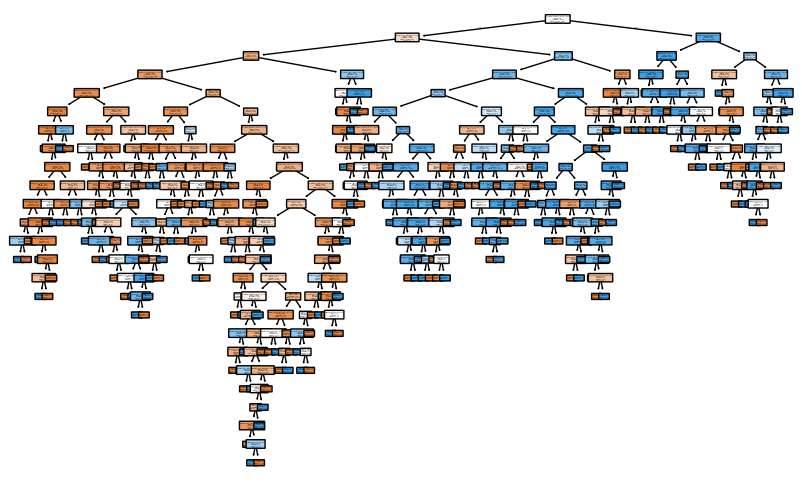

In [56]:
plt.figure(figsize=(10,6))
plot_tree(dtree,
          feature_names=X_train.columns,
         class_names=['yes','No'],
          filled=True,
          rounded=True
         )
plt.show()

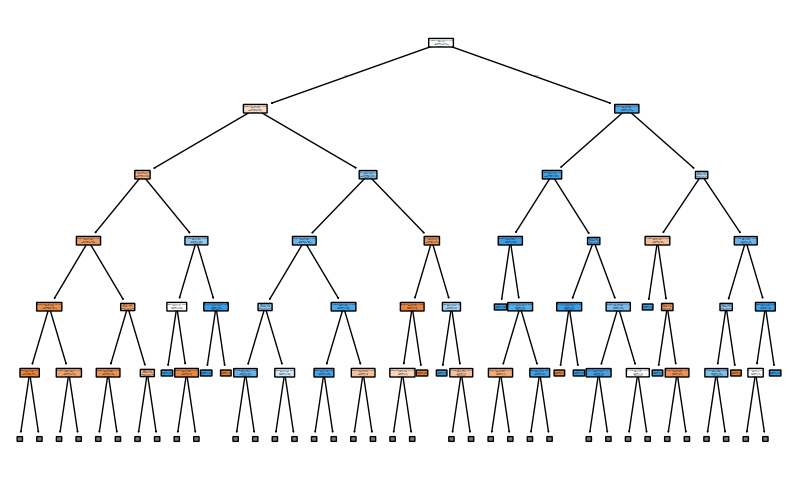

In [57]:
plt.figure(figsize=(10,6))
plot_tree(dtree,
          max_depth=5,
          feature_names=X_train.columns,
         class_names=['yes','No'],
          filled=True,
          rounded=True
         )
plt.show()

**Model Prediction**

In [58]:
y_pred=dtree.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,

In [59]:
X_test.shape,y_pred.shape,y_test.shape

((682, 10), (682,), (682,))

In [60]:
print(y_pred[:20]) # array
#y_test[:10] # series
print(y_test.values[:20])

[0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0]
[0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0]


In [61]:
# we will create a dataframe
# X_test : y_actual-(y_test) y_pred
X_test

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls
32,1,-0.558941,-0.269590,0,0,-1.817880,-1.082193,-1.558520,-0.197185,-0.415473
3395,0,4.238765,0.557062,0,0,0.955425,0.284978,-2.204702,-1.001062,-1.169565
2374,0,-0.391897,-1.835397,0,0,-1.007661,-0.604852,0.968580,-1.053710,3.399501
1395,0,0.814448,0.507786,0,0,-0.028480,-0.324324,-0.381465,1.812507,-0.415473
229,0,-1.638033,-0.319743,0,0,-0.626188,-1.767884,-1.763225,1.812507,-0.415473
...,...,...,...,...,...,...,...,...,...,...
572,1,-0.166544,-0.896506,0,0,-0.322679,1.444038,1.102647,-0.599124,-0.415473
1468,1,-0.558941,-0.645740,0,0,-0.145787,0.505724,0.232650,0.606692,-0.415473
952,1,-0.558941,-0.470203,1,0,0.883909,0.613991,0.642060,-0.599124,-1.178468
3032,1,-0.257909,0.331758,0,0,-2.197728,1.260054,0.686712,-0.603065,2.629024


**Model Evalution**

In [62]:
eval_df=pd.DataFrame(X_test)
eval_df['y_actual']=y_test
eval_df['y_prediction']=y_pred
eval_df
# create one more column called Correct_prediction
# if y_actual==y_pred the correct_prediction=1 else 0

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,y_actual,y_prediction
32,1,-0.558941,-0.269590,0,0,-1.817880,-1.082193,-1.558520,-0.197185,-0.415473,0,0
3395,0,4.238765,0.557062,0,0,0.955425,0.284978,-2.204702,-1.001062,-1.169565,1,1
2374,0,-0.391897,-1.835397,0,0,-1.007661,-0.604852,0.968580,-1.053710,3.399501,1,1
1395,0,0.814448,0.507786,0,0,-0.028480,-0.324324,-0.381465,1.812507,-0.415473,0,0
229,0,-1.638033,-0.319743,0,0,-0.626188,-1.767884,-1.763225,1.812507,-0.415473,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
572,1,-0.166544,-0.896506,0,0,-0.322679,1.444038,1.102647,-0.599124,-0.415473,0,0
1468,1,-0.558941,-0.645740,0,0,-0.145787,0.505724,0.232650,0.606692,-0.415473,0,0
952,1,-0.558941,-0.470203,1,0,0.883909,0.613991,0.642060,-0.599124,-1.178468,0,0
3032,1,-0.257909,0.331758,0,0,-2.197728,1.260054,0.686712,-0.603065,2.629024,1,1


In [63]:
# create one more column called Correct_prediction
# if y_actual==y_pred the correct_prediction=1 else 0

import numpy as np
con1=eval_df['y_actual']==eval_df['y_prediction']
eval_df['Correct_prediction']=np.where(con1,1,0)
eval_df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,y_actual,y_prediction,Correct_prediction
32,1,-0.558941,-0.269590,0,0,-1.817880,-1.082193,-1.558520,-0.197185,-0.415473,0,0,1
3395,0,4.238765,0.557062,0,0,0.955425,0.284978,-2.204702,-1.001062,-1.169565,1,1,1
2374,0,-0.391897,-1.835397,0,0,-1.007661,-0.604852,0.968580,-1.053710,3.399501,1,1,1
1395,0,0.814448,0.507786,0,0,-0.028480,-0.324324,-0.381465,1.812507,-0.415473,0,0,1
229,0,-1.638033,-0.319743,0,0,-0.626188,-1.767884,-1.763225,1.812507,-0.415473,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,1,-0.166544,-0.896506,0,0,-0.322679,1.444038,1.102647,-0.599124,-0.415473,0,0,1
1468,1,-0.558941,-0.645740,0,0,-0.145787,0.505724,0.232650,0.606692,-0.415473,0,0,1
952,1,-0.558941,-0.470203,1,0,0.883909,0.613991,0.642060,-0.599124,-1.178468,0,0,1
3032,1,-0.257909,0.331758,0,0,-2.197728,1.260054,0.686712,-0.603065,2.629024,1,1,1


**Metrics**

**Accuracy**

- sum of all correct observations upon total observations

In [64]:
import numpy as np
# y_test.values==y_pred True False
# counting how many True cases
no_of_correct=np.sum(y_test.values==y_pred)
accuracy=round(no_of_correct/len(y_pred),2)
accuracy

0.88

In [65]:
con1=y_test==y_pred
round(np.sum(np.sum(np.where(con1,1,0)))/len(y_pred),2)

0.88

In [66]:
# error rate
er=1-accuracy
er

0.12

**TP-TN-FP-FN**

- TP: y_actual==1 and y_pred==1

- TN: y_actual==0 and y_pred==0

- FP: y_actual==0 and y_pred==1

- FN: y_actual==1 and y_pred==0

In [67]:
TP=np.sum((y_test.values==1) & (y_pred==1))
TN=np.sum((y_test.values==0) & (y_pred==0))
FP=np.sum((y_test.values==0) & (y_pred==1))
FN=np.sum((y_test.values==1) & (y_pred==0))
print('TP:',TP)
print('TN:',TN)
print('FP:',FP)
print('FN:',FN)

TP: 284
TN: 313
FP: 49
FN: 36


In [68]:
precision=round(TP/(TP+FP),2)
print('Precision:',precision)

Precision: 0.85


In [69]:
recall=round(TP/(TP+FN),2)
print('Recall',recall)

Recall 0.89


In [70]:
f1_score=round((2*precision*recall/(precision+recall)),2)
print('F1_Score:',f1_score)

F1_Score: 0.87


**using package**

In [71]:
from sklearn.metrics import confusion_matrix,precision_score,\
                             recall_score,f1_score,accuracy_score,\
                            roc_curve,auc,ConfusionMatrixDisplay

**Confusion_Matrix**

In [72]:
dtree_cmt=confusion_matrix(y_test,y_pred)
dtree_cmt
# in python index start with 0
# 0 means NO
# 1 means Yes
# in the text book we write as Yes NO
# python will give No Yes

array([[313,  49],
       [ 36, 284]], dtype=int64)

In [73]:
tn,fp,fn,tp=dtree_cmt.ravel()
print("True Positives are:",tp)
print("True Negatives are:",tn)
print("False Positives are:",fp)
print("False Positives are:",fn)

True Positives are: 284
True Negatives are: 313
False Positives are: 49
False Positives are: 36


**Draw the confusion matrix**

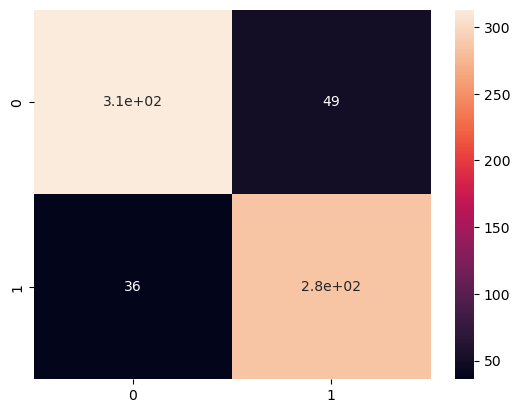

In [74]:
import seaborn as sns
sns.heatmap(dtree_cmt,annot=True)
plt.show()

**ConfusionMatrixDisplay**

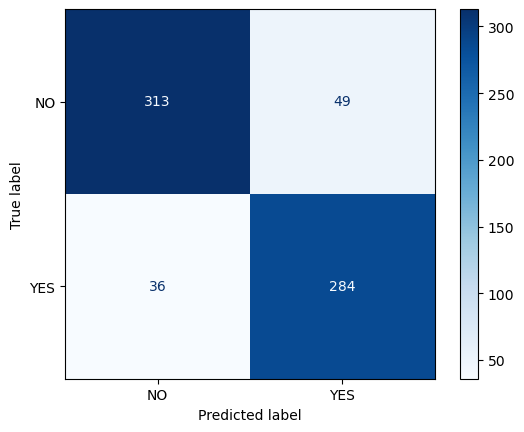

In [75]:
cmt=ConfusionMatrixDisplay(dtree_cmt,display_labels=['NO','YES'])
cmt.plot(cmap='Blues')

**precision,recall,accuracy,f1_score**

In [76]:
dtree_pr=round(precision_score(y_test,y_pred),2)
dtree_rc=round(recall_score(y_test,y_pred),2)
dtree_acc=round(accuracy_score(y_test,y_pred),2)
dtree_f1=round(f1_score(y_test,y_pred),2)
print('Precision is:',dtree_pr)
print('Recall is:',dtree_rc)
print('Accuracy is:',dtree_acc)
print('F1_Score is:',dtree_f1)

Precision is: 0.85
Recall is: 0.89
Accuracy is: 0.88
F1_Score is: 0.87


True Positives are: 283
True Negatives are: 307
False Positives are: 55
False Positives are: 37
Precision is: 0.84
Recall is: 0.88
Accuracy is: 0.87
F1_Score is: 0.86


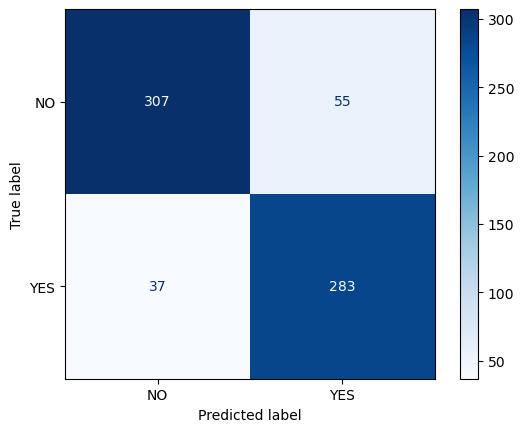

In [77]:
## All together
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

df=pd.read_csv('preprocessd_data.csv')
X=df.drop("churn",axis=1)
y=df['churn']

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape
############################### Develop the model ###############################
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
################################################################################
eval_df=pd.DataFrame(X_test)
eval_df['y_actual']=y_test
eval_df['y_prediction']=y_pred
con1=eval_df['y_actual']==eval_df['y_prediction']
eval_df['Correct_prediction']=np.where(con1,1,0)
eval_df
######################### Metrics ###################################
from sklearn.metrics import confusion_matrix,precision_score,\
                             recall_score,f1_score,accuracy_score,\
                            roc_curve,auc,ConfusionMatrixDisplay
#Confusion Matrix
dtree_cmt=confusion_matrix(y_test,y_pred)

# TP-TN-FP-FN
tn,fp,fn,tp=dtree_cmt.ravel()
print("True Positives are:",tp)
print("True Negatives are:",tn)
print("False Positives are:",fp)
print("False Positives are:",fn)

#ConfusionMatrixDisplay
cmt=ConfusionMatrixDisplay(dtree_cmt,display_labels=['NO','YES'])
cmt.plot(cmap='Blues')

#precision,recall,accuracy,f1_score
dtree_pr=round(precision_score(y_test,y_pred),2)
dtree_rc=round(recall_score(y_test,y_pred),2)
dtree_acc=round(accuracy_score(y_test,y_pred),2)
dtree_f1=round(f1_score(y_test,y_pred),2)
print('Precision is:',dtree_pr)
print('Recall is:',dtree_rc)
print('Accuracy is:',dtree_acc)
print('F1_Score is:',dtree_f1)

In [78]:
dtree_acc=round(accuracy_score(y_test,y_pred),2)
dtree_pr=round(precision_score(y_test,y_pred),2)
dtree_rc=round(recall_score(y_test,y_pred),2)
dtree_f1=round(f1_score(y_test,y_pred),2)

data=[dtree_acc,dtree_pr,dtree_rc,dtree_f1]
idx=['Accuracy','Precision','Recall','F1_Score']
cols=['METRICS_VALUES']
df=pd.DataFrame(data,index=idx,columns=cols)
df.to_csv('DecisionTree_Metrics.csv')
df

,METRICS_VALUES
Accuracy,0.87
Precision,0.84
Recall,0.88
F1_Score,0.86


In [79]:
# KNN
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 

**ROC-AUC CURVE**

- ROC

- Roc curve is a graph between **(1-specificity) V/S sensitivity**

- FPR V/S TPR

- precision score , recall score , f1_score , accuracy score

    - takes y_true V/S y_pred
 
- but Roc curve takes y_true vs y_score

    - y_score means probabilities
 
- for every observation model will give two probabilities

- here we have two labels NO and YES

- So we will get two probabilities by using a method : predict prob  

In [80]:
y_predict_prob=dtree.predict_proba(X_test)

#obs   No   Yes
# 1)   1     0    100% chance that output become No : 0
# 2)   0     1    100% chance that output become No : 1
# 3)   0     1    100% chance that output become No : 1

# [No,Yes,Yes,No,No]=[0,1,1,0,0]
#dtree.predict(X_test)
# predict and predict_prob both should be equal
y_predict_prob_yes=y_predict_prob[:,1] # all the rows from one column
y_predict_prob_yes

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0.

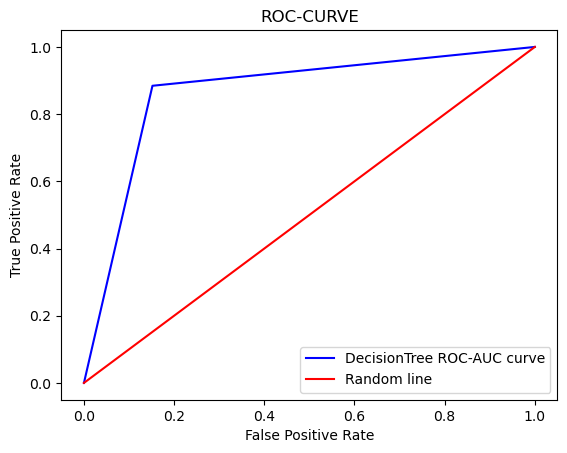

In [81]:
import matplotlib.pyplot as plt
fpr,tpr,threshoulds=roc_curve(y_test,y_predict_prob_yes)
plt.plot(fpr,tpr,color='blue',label='DecisionTree ROC-AUC curve')
plt.plot([0,1],[0,1],color='red',label='Random line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-CURVE')
plt.legend()

# Using Hyper parameter

**Hyper parameter tuning**

- The parameters or arguments of model can change by user to get the good model performance

- Grid search

- Random search

- Assume that in Decsision tree we have following hyper parameter

    - criterion : {"gini", "entropy", "log_loss"}
        
    - splitter : {"best", "random"}
     
    - max depth : {1,2,3,4,5,6}
        
- By default we have criterion 'gini' is there

- But the model might be performed when criterion is 'entropy' also

- we need to test the combinations by providing different values

- To try the combinations we have two methods

    - Grid search:
        
        - it is a step by step by consider the all combinations
        
        - in criterion: 3,splitter: 2, max depth=6
                
        - The total combinations are : 3x2x6=36
            
    - Random search:
        
        - It will not do all 36 possibile combiantions
        
        - It will select randomly some combinations
        
- Generally we do Grid search 

- By doing this we have term called Cross validation


**Cross validation**:
    
- Cross validation: CV
    
- CV=4 means we devide data randomly into 4 parts

- Out of these 4 parts every time 3 parts consider as train data, 1 parts consider as test data

- P1  P2  P3  P4  are 4 parts of data

- Combination1:  P1 + P2 + P3 are train data  and P4 as test data
    
    - For Combination-1 will try to imporove model performance by doing Hyper parameter tuning
    
    - Assume there 36 comninations are available in DT
    
    - For the Combination1 will do all 36
 
    - so we have 36 hyper parameter comninations for each combination will have one accuracy
 
    - so we have total 36 accuracy values

- Combination2:  P1 + P2 + P4   are train data  and   P3 as test data
    
    - For Combination-2 will try to imporove model performance by doing Hyper parameter tuning
    
    - Assume there 36 comninations are available in DT
    
    - For the Combination-2 will do all 36 

- Combination3:  P1 + P3 + P4  are train data and P2 as test data
    
    - For Combination-3 will try to imporove model performance by doing Hyper parameter tuning
    
    - Assume there 36 comninations are available in DT
    
    - For the Combination-3 will do all 36 

- Combination-4: P2 + P3 + P4  are train data and P1 as test data
    
    - For Combination-4 will try to imporove model performance by doing Hyper parameter tuning
    
    - Assume there 36 comninations are available in DT
    
    - For the Combination-4 will do all 36
    
- Every combination gives 36 accurcy values corresponding each hyper parameter

- will calculate all the average accuracy of combinations individual accuracy w.r.t to each hyper parameter

- so that will get 36 average accuracy values w.r.t each hyper parameter

- Out of these 36 the maximum one is our best accuracy and corresponding hyper parameters are best parameters  

In [37]:
import pandas as pd
idx=[f'hp_{i}' for i in range(1,37)]
col1=[f'combination_1_acc_{i}' for i in range(1,37)]
col2=[f'combination_2_acc_{i}' for i in range(1,37)]
col3=[f'combination_3_acc_{i}' for i in range(1,37)]
col4=[f'combination_4_acc_{i}' for i in range(1,37)]
col5=[f'avg_acc_{i}' for i in range(1,37)]
cols=['C1','C2','C3','C4','AVG_ACC']
pd.DataFrame(zip(col1,col2,col3,col4,col5),index=idx,columns=cols)

,C1,C2,C3,C4,AVG_ACC
hp_1,combination_1_acc_1,combination_2_acc_1,combination_3_acc_1,combination_4_acc_1,avg_acc_1
hp_2,combination_1_acc_2,combination_2_acc_2,combination_3_acc_2,combination_4_acc_2,avg_acc_2
hp_3,combination_1_acc_3,combination_2_acc_3,combination_3_acc_3,combination_4_acc_3,avg_acc_3
hp_4,combination_1_acc_4,combination_2_acc_4,combination_3_acc_4,combination_4_acc_4,avg_acc_4
hp_5,combination_1_acc_5,combination_2_acc_5,combination_3_acc_5,combination_4_acc_5,avg_acc_5
hp_6,combination_1_acc_6,combination_2_acc_6,combination_3_acc_6,combination_4_acc_6,avg_acc_6
hp_7,combination_1_acc_7,combination_2_acc_7,combination_3_acc_7,combination_4_acc_7,avg_acc_7
hp_8,combination_1_acc_8,combination_2_acc_8,combination_3_acc_8,combination_4_acc_8,avg_acc_8
hp_9,combination_1_acc_9,combination_2_acc_9,combination_3_acc_9,combination_4_acc_9,avg_acc_9
hp_10,combination_1_acc_10,combination_2_acc_10,combination_3_acc_10,combination_4_acc_10,avg_acc_10


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)      # to get different different colors
pd.set_option('display.max_columns',None)  # to display the max columns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,\
                            precision_score,\
                            recall_score,\
                           f1_score,\
                           classification_report,\
                           roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

**Read data**

In [33]:
df=pd.read_csv('preprocessd_data.csv')
df

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,-0.944404,-1.403000,-0.415473,0
1,0,0.029654,1.235009,0,0,0.304821,-0.901748,-0.688523,-0.599124,0.347522,0
2,0,2.580235,0.658246,0,0,-2.266627,0.613991,-0.483818,-1.403000,2.636507,1
3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,0.079121,-0.197185,1.110517,0
4,0,0.127754,2.288228,0,0,-0.333851,0.253101,-0.893228,1.008630,-0.415473,0
...,...,...,...,...,...,...,...,...,...,...,...
3401,1,-0.805656,0.479710,0,0,0.887802,0.552184,0.865765,-0.495634,-0.415473,1
3402,0,0.477826,0.674425,0,0,2.038061,-0.931071,0.567257,2.100185,0.235227,1
3403,0,-0.550521,0.426099,0,1,-0.410669,0.344847,-0.729485,-0.403904,1.873512,1
3404,0,0.004651,-0.444637,0,0,1.359751,-0.847121,-0.715010,-0.197185,-1.178468,1


**Divide into X and y**

In [34]:
X=df.drop('churn',axis=1)
y=df['churn']

**Train Test split**

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2724, 10)
(682, 10)
(2724,)
(682,)


**Read the base model**

In [36]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
grid_tree=DecisionTreeClassifier()              # base model
grid_tree

# here we are not fitting the data

DecisionTreeClassifier()

**Create parameter files**

In [37]:
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
# you need to create dictionary with hyper parameters
param_grid={
    'criterion':['gini','entropy'], #2
    'max_depth': [3,4,5,6,7,8], # 6
    'min_samples_split': [2,3,4], #3
    'min_samples_leaf': [1,2,3,4], #4
    'random_state': [0,42] #2
}

# 2*6*3*4*2=288

In [39]:
grid_search=GridSearchCV(grid_tree, #base model
                        param_grid, # param
                        scoring='accuracy',# metric
                        cv=5,
                        verbose=True)

# Verbose = True I will show in Deep learning in detail

In [41]:
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

**Fit the data**

In [42]:
import time
start=time.time()
grid_search.fit(X_train,y_train)
# generally we will pass the entire data
# X_train= input data
# y_train = output data
end=time.time()
print('Total time taken is:',(end-start))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Total time taken is: 19.123591899871826


In [43]:
dir(grid_search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 '_validate_params',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'feature_names_in_',
 'fit',
 'get_params',
 'inverse_transform',
 

**Best estimation**

In [49]:
grid_search.best_estimator_

# estimator means model : 1440models

# best estimator is your model
# if you use this model
# then we need to find all the metrics

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       random_state=0)

In [44]:
grid_search.best_score_
# not a single accuracy

0.8649001618996222

In [45]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 0}

In [46]:
grid_search.cv_results_

{'mean_fit_time': array([0.01112781, 0.01290674, 0.0115253 , 0.00561371, 0.00575638,
        0.00632501, 0.00728908, 0.01209321, 0.01115961, 0.0070622 ,
        0.00761876, 0.0092422 , 0.00849757, 0.01013546, 0.01431599,
        0.00913177, 0.00837154, 0.0083581 , 0.00823998, 0.00710764,
        0.01481543, 0.01297121, 0.00830145, 0.0087656 , 0.00883293,
        0.00770221, 0.00716891, 0.00993404, 0.01423397, 0.01143923,
        0.00781136, 0.00890069, 0.00997019, 0.00911512, 0.00931492,
        0.0095439 , 0.00883427, 0.01580148, 0.01192012, 0.00805564,
        0.00727935, 0.00717549, 0.00743227, 0.00796428, 0.00718231,
        0.00755019, 0.00717425, 0.00742345, 0.0084651 , 0.00886254,
        0.00905328, 0.0092402 , 0.00856295, 0.00831733, 0.00837755,
        0.00865688, 0.01054907, 0.008671  , 0.00832305, 0.00862565,
        0.0081171 , 0.00838699, 0.00927696, 0.00777836, 0.00847793,
        0.00837712, 0.00872974, 0.00976291, 0.01127582, 0.01058316,
        0.010743  , 0.01123123,

In [47]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_random_state', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [48]:
c1=grid_search.cv_results_['split0_test_score']
c2=grid_search.cv_results_['split1_test_score']
c3=grid_search.cv_results_['split2_test_score']
c4=grid_search.cv_results_['split3_test_score']
c5=grid_search.cv_results_['split4_test_score']
mean_score=grid_search.cv_results_['mean_test_score']
df=pd.DataFrame(zip(c1,c2,c3,c4,c5,mean_score),
             columns=['C1','C2','C3','C4','C5','mean_test_score'],
             index=grid_search.cv_results_['params'])

avg=[sum(i[:-1])/5 for i in df.values]
max(avg)
df['Average']=avg
df

,C1,C2,C3,C4,C5,mean_test_score,Average
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}",0.827523,0.829358,0.814679,0.825688,0.810662,0.821582,0.821582
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}",0.827523,0.829358,0.814679,0.825688,0.810662,0.821582,0.821582
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 0}",0.827523,0.829358,0.814679,0.825688,0.810662,0.821582,0.821582
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 42}",0.827523,0.829358,0.814679,0.825688,0.810662,0.821582,0.821582
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 0}",0.827523,0.829358,0.814679,0.825688,0.810662,0.821582,0.821582
...,...,...,...,...,...,...,...
"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}",0.877064,0.871560,0.851376,0.858716,0.845588,0.860861,0.860861
"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3, 'random_state': 0}",0.880734,0.880734,0.849541,0.860550,0.852941,0.864900,0.864900
"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3, 'random_state': 42}",0.877064,0.871560,0.851376,0.858716,0.845588,0.860861,0.860861
"{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 4, 'random_state': 0}",0.880734,0.880734,0.849541,0.860550,0.852941,0.864900,0.864900


In [55]:
grid_search.best_index_

282

In [56]:
df.iloc[282]
#[0.88073394, 0.88073394, 0.84954128, 0.86055046, 0.85294118]

C1                 0.880734
C2                 0.880734
C3                 0.849541
C4                 0.860550
C5                 0.852941
mean_test_score    0.864900
Average            0.864900
Name: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}, dtype: float64

In [57]:
id=[df['Average'].idxmax(axis=0)]
[i for i in df[id].values]

TypeError: unhashable type: 'dict'

**CROSS VALIDATION SCORE**

- Now we use the best model

- Perform the cross validation score

- Best model means it takes the beest parameters

- Cross validation 5 means , it gives 5 accuracy values

- Take the average of all accuracy again that should be equal to best accuracy

In [58]:
# Assume that we already know the best model
# best parameters with out doing grid search
# now I want to apply cross validation
# in the cross validation every part involved in training and testing
# cross_val_score cv=5 by default

In [59]:
accuracy_list=cross_val_score(grid_search.best_estimator_,
                             X_train,
                             y_train,cv=5,scoring='accuracy')
accuracy_list

array([0.88073394, 0.88073394, 0.84954128, 0.86055046, 0.85294118])

In [60]:
accuracy_list.mean()

0.8649001618996222